**Problem Statement**: The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

In [ ]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,shapiro,kstest,lognorm,ttest_rel,wilcoxon

from sklearn.preprocessing import MinMaxScaler, StandardScaler

warnings.filterwarnings("ignore")


In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181 -Odelhivery.csv

--2023-08-22 18:07:57--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.176, 108.157.172.183, 108.157.172.10, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery.csv’

delhivery.csv       100%[===================>]  53.04M   113MB/s    in 0.5s    

2023-08-22 18:07:58 (113 MB/s) - ‘delhivery.csv’ saved [55617130/55617130]



In [ ]:
df=pd.read_csv('delhivery.csv')
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


data - tells whether the data is testing or training data

trip_creation_time – Timestamp of trip creation

route_schedule_uuid – Unique Id for a particular route schedule

route_type – Transportation type

FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way

Carting: Handling system consisting of small vehicles (carts)

trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)

source_center - Source ID of trip origin

source_name - Source Name of trip origin

destination_cente – Destination ID

destination_name – Destination Name

od_start_time – Trip start time

od_end_time – Trip end time

start_scan_to_end_scan – Time taken to deliver from source to destination
is_cutoff – Unknown field

cutoff_factor – Unknown field

cutoff_timestamp – Unknown field

actual_distance_to_destination – Distance in Kms between source and destination warehouse

actual_time – Actual time taken to complete the delivery (Cumulative)

osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

factor – Unknown field

segment_actual_time – This is a segment time. Time taken by the subset of the package delivery

segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery

segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery

segment_factor – Unknown field

In [ ]:
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [ ]:
# Exploratory Data Analysis

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
df.shape

(144867, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

trip_Creation_time,od_start_time and od_end_time,cutoff_timestamp columns should be of datetime datatype but it is of object dtype need to change

In [ ]:
columns=['trip_creation_time','od_start_time','od_end_time','cutoff_timestamp']
for i in columns:
  df[i]=df[i].str.split('.').apply(lambda x:x[0])

In [ ]:
df['trip_creation_time']

0         2018-09-20 02:35:36
1         2018-09-20 02:35:36
2         2018-09-20 02:35:36
3         2018-09-20 02:35:36
4         2018-09-20 02:35:36
                 ...         
144862    2018-09-20 16:24:28
144863    2018-09-20 16:24:28
144864    2018-09-20 16:24:28
144865    2018-09-20 16:24:28
144866    2018-09-20 16:24:28
Name: trip_creation_time, Length: 144867, dtype: object

In [ ]:
df['od_start_time']

0         2018-09-20 03:21:32
1         2018-09-20 03:21:32
2         2018-09-20 03:21:32
3         2018-09-20 03:21:32
4         2018-09-20 03:21:32
                 ...         
144862    2018-09-20 16:24:28
144863    2018-09-20 16:24:28
144864    2018-09-20 16:24:28
144865    2018-09-20 16:24:28
144866    2018-09-20 16:24:28
Name: od_start_time, Length: 144867, dtype: object

In [ ]:
df['od_end_time']

0         2018-09-20 04:47:45
1         2018-09-20 04:47:45
2         2018-09-20 04:47:45
3         2018-09-20 04:47:45
4         2018-09-20 04:47:45
                 ...         
144862    2018-09-20 23:32:09
144863    2018-09-20 23:32:09
144864    2018-09-20 23:32:09
144865    2018-09-20 23:32:09
144866    2018-09-20 23:32:09
Name: od_end_time, Length: 144867, dtype: object

In [ ]:
df['cutoff_timestamp']

0         2018-09-20 04:27:55
1         2018-09-20 04:17:55
2         2018-09-20 04:01:19
3         2018-09-20 03:39:57
4         2018-09-20 03:33:55
                 ...         
144862    2018-09-20 21:57:20
144863    2018-09-20 21:31:18
144864    2018-09-20 21:11:18
144865    2018-09-20 20:53:19
144866    2018-09-20 16:24:28
Name: cutoff_timestamp, Length: 144867, dtype: object

In [ ]:
columns=['trip_creation_time','od_start_time','od_end_time','cutoff_timestamp']
for i in columns:
  df[i]=pd.to_datetime(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [ ]:
df.describe(include='object')

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144867,144867,144574,144867,144606
unique,2,1504,2,14817,1508,1498,1481,1468
top,training,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,104858,1812,99660,101,23347,23347,15192,15192


In [ ]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

source_name and destination_name have null values

In [ ]:
df.loc[df['trip_uuid']=='trip-153741093647649320', ['trip_uuid', 'source_name', 'destination_name', 'segment_actual_time','actual_time','segment_osrm_time','osrm_time','segment_osrm_distance','osrm_distance']]

,trip_uuid,source_name,destination_name,segment_actual_time,actual_time,segment_osrm_time,osrm_time,segment_osrm_distance,osrm_distance
0,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),14.0,14.0,11.0,11.0,11.9653,11.9653
1,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),10.0,24.0,9.0,20.0,9.7590,21.7243
2,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),16.0,40.0,7.0,28.0,10.8152,32.5395
3,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),21.0,62.0,12.0,40.0,13.0224,45.5620
4,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),6.0,68.0,5.0,44.0,3.9153,54.2181
5,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),15.0,15.0,11.0,11.0,12.1171,12.1171
6,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),28.0,44.0,6.0,17.0,9.1719,21.2890
7,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),21.0,65.0,11.0,29.0,14.5362,35.8252
8,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),10.0,76.0,10.0,39.0,11.3648,47.1900
9,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),26.0,102.0,6.0,45.0,6.0434,53.2334


In [ ]:
#Missing value imputation

In [ ]:
df.loc[df['source_name'].isnull(),'source_center'].unique()

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

These are the unique source centers which hs null values in source name we can just impute unknown as source_name as we cannot identify source name here.

In [ ]:
df.loc[df['source_center']=='IND577116AAA']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
984,test,2018-10-01 20:56:18,thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...,FTL,trip-153842737815495661,IND577116AAA,NaN,IND577101AAA,Chikmagalur_DC (Karnataka),2018-10-02 02:07:27,...,2018-10-02 02:20:31,23.190569,33.0,20.0,26.7667,1.650000,33.0,20.0,26.7667,1.650000
985,test,2018-10-01 20:56:18,thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...,FTL,trip-153842737815495661,IND577116AAA,NaN,IND577101AAA,Chikmagalur_DC (Karnataka),2018-10-02 02:07:27,...,2018-10-02 02:08:30,34.548289,45.0,40.0,44.1599,1.125000,12.0,26.0,25.7840,0.461538
2754,test,2018-09-30 22:06:37,thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...,FTL,trip-153834519721733970,IND577116AAA,NaN,IND577101AAA,Chikmagalur_DC (Karnataka),2018-10-01 02:15:57,...,2018-10-01 02:20:40,22.065946,29.0,19.0,25.5414,1.526316,29.0,19.0,25.5414,1.526316
2755,test,2018-09-30 22:06:37,thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...,FTL,trip-153834519721733970,IND577116AAA,NaN,IND577101AAA,Chikmagalur_DC (Karnataka),2018-10-01 02:15:57,...,2018-10-01 02:17:32,27.345947,33.0,22.0,30.4210,1.500000,3.0,3.0,4.8796,1.000000
12129,test,2018-10-02 21:21:08,thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...,FTL,trip-153851526862672465,IND577116AAA,NaN,IND577101AAA,Chikmagalur_DC (Karnataka),2018-10-03 02:25:59,...,2018-10-03 02:41:31,23.187244,21.0,19.0,25.8457,1.105263,21.0,19.0,25.8457,1.105263
12130,test,2018-10-02 21:21:08,thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...,FTL,trip-153851526862672465,IND577116AAA,NaN,IND577101AAA,Chikmagalur_DC (Karnataka),2018-10-03 02:25:59,...,2018-10-03 02:29:31,33.082818,33.0,38.0,41.7461,0.868421,12.0,26.0,25.9110,0.461538
63186,test,2018-10-03 21:27:10,thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...,FTL,trip-153860203010589724,IND577116AAA,NaN,IND577101AAA,Chikmagalur_DC (Karnataka),2018-10-04 02:22:05,...,2018-10-04 02:38:30,25.836968,27.0,22.0,29.4138,1.227273,27.0,22.0,29.4138,1.227273
63187,test,2018-10-03 21:27:10,thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...,FTL,trip-153860203010589724,IND577116AAA,NaN,IND577101AAA,Chikmagalur_DC (Karnataka),2018-10-04 02:22:05,...,2018-10-04 02:26:33,34.663534,39.0,41.0,44.3096,0.951220,11.0,27.0,23.8689,0.407407
71442,training,2018-09-26 21:33:10,thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...,FTL,trip-153799759049764136,IND577116AAA,NaN,IND577101AAA,Chikmagalur_DC (Karnataka),2018-09-27 02:10:44,...,2018-09-27 02:21:18,26.899557,33.0,21.0,30.3403,1.571429,33.0,21.0,30.3403,1.571429
71443,training,2018-09-26 21:33:10,thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...,FTL,trip-153799759049764136,IND577116AAA,NaN,IND577101AAA,Chikmagalur_DC (Karnataka),2018-09-27 02:10:44,...,2018-09-27 02:11:57,34.475504,43.0,39.0,43.8415,1.102564,9.0,27.0,22.9635,0.333333


In [ ]:
df.loc[df['source_center']=='IND209304AAA',['od_start_time','od_end_time']].head(50)

,od_start_time,od_end_time
146,2018-09-16 17:10:35,2018-09-17 01:33:09
147,2018-09-16 17:10:35,2018-09-17 01:33:09
148,2018-09-16 17:10:35,2018-09-17 01:33:09
1224,2018-09-15 00:35:51,2018-09-15 03:37:05
1225,2018-09-15 00:35:51,2018-09-15 03:37:05
1226,2018-09-15 00:35:51,2018-09-15 03:37:05
1227,2018-09-15 00:35:51,2018-09-15 03:37:05
1228,2018-09-15 00:35:51,2018-09-15 03:37:05
3730,2018-09-16 14:43:21,2018-09-17 03:27:44
3731,2018-09-16 14:43:21,2018-09-17 03:27:44


In [ ]:
df['source_name']=df['source_name'].fillna('unknown')
df['destination_name']=df['destination_name'].fillna('unknown')

In [ ]:
df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [ ]:
# Visual Analysis

In [ ]:
df['route_type'].value_counts()

FTL        99660
Carting    45207
Name: route_type, dtype: int64

In [ ]:
df['data'].unique()

array(['training', 'test'], dtype=object)

In [ ]:
df['data'].value_counts()

training    104858
test         40009
Name: data, dtype: int64

### **Grouping by sub-journey in the trip**

In [ ]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']

segment_columns = ['segment_actual_time','segment_osrm_time', 'segment_osrm_distance']

for column in segment_columns:
    df[column + '_sum'] = df.groupby('segment_key')[column].cumsum()

df[[column + '_sum' for column in segment_columns]]

,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,14.0,11.0,11.9653
1,24.0,20.0,21.7243
2,40.0,27.0,32.5395
3,61.0,39.0,45.5619
4,67.0,44.0,49.4772
...,...,...,...
144862,92.0,94.0,65.3487
144863,118.0,115.0,82.7212
144864,138.0,149.0,103.4265
144865,155.0,176.0,122.3150


In [ ]:
segment_dict = {

    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'last',
    'start_scan_to_end_scan' : 'first',

    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',

}

In [ ]:
segmented_data = df.groupby('segment_key').agg(segment_dict).sort_values(['segment_key','od_end_time'], ascending=True).reset_index(drop=True)

In [ ]:
segmented_data

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46,2018-09-13 13:40:23,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16,2018-09-12 16:39:46,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09,2018-09-12 03:01:59,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22,2018-09-12 02:03:09,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,training,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17,2018-09-14 17:34:55,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,test,2018-10-03 23:59:14,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04,2018-10-04 03:31:11,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0
26364,test,2018-10-03 23:59:14,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39,2018-10-04 05:47:45,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0
26365,test,2018-10-03 23:59:14,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53,2018-10-04 02:29:04,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0
26366,test,2018-10-03 23:59:42,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40,2018-10-04 08:46:09,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0


In [ ]:
segmented_data.loc[segmented_data['trip_uuid']=='trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
10374,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,39.386040,68.0,44.0,54.2181,67.0,49.4772,44.0
10375,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45,2018-09-20 06:36:55,109.0,43.595802,102.0,45.0,53.2334,100.0,53.2334,44.0


In [ ]:
trip_dict={'data':'first',
           'trip_creation_time':'first',
           'route_schedule_uuid':'first',
           'route_type':'first',
           'trip_uuid':'first',
           'source_center':'first',
           'source_name':'first',
           'destination_center':'last',
           'destination_name':'last',
           'od_start_time':'first',
           'od_end_time':'last',

          'actual_distance_to_destination' : 'sum',
          'actual_time' : 'sum',
          'osrm_time' : 'sum',
          'osrm_distance' : 'sum',

          'start_scan_to_end_scan' : 'sum',

          'segment_actual_time_sum' : 'sum',
          'segment_osrm_distance_sum' : 'sum',
          'segment_osrm_time_sum' : 'sum',
           }

### **Grouping by trip uuid**

In [ ]:
trip_agg = segmented_data.groupby('trip_uuid').agg(trip_dict).reset_index(drop = True)

In [ ]:
trip_agg

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,source_place,source_code,source_state,source_city,year,month,week,dayofweek,day,hour
0,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2018-09-12 16:39:46,...,Central,6,Uttar Pradesh,Kanpur,2018,9,37,2,Wednesday,0
1,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),2018-09-12 02:03:09,...,ChikaDPP,D,Karnataka,Doddablpur,2018,9,37,2,Wednesday,0
2,training,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),2018-09-14 03:40:17,...,Bilaspur,HB,Haryana,Gurgaon,2018,9,37,2,Wednesday,0
3,training,2018-09-12 00:01:00,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),2018-09-12 00:01:00,...,Mumbai,Mumbai Hub,Maharashtra,Mumbai,2018,9,37,2,Wednesday,0
4,training,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),2018-09-12 00:02:09,...,Bellary,Dc,Karnataka,Bellary,2018,9,37,2,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),2018-10-03 23:55:56,...,Mehmdpur,H,Punjab,Chandigarh,2018,10,40,2,Wednesday,23
14813,test,2018-10-03 23:57:23,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),2018-10-03 23:57:23,...,Balabhgarh,DPC,Haryana,FBD,2018,10,40,2,Wednesday,23
14814,test,2018-10-03 23:57:44,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),2018-10-04 02:51:27,...,GovndNgr,DC,Uttar Pradesh,Kanpur,2018,10,40,2,Wednesday,23
14815,test,2018-10-03 23:59:14,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),2018-10-03 23:59:14,...,VdkkuSrt,I,Tamil Nadu,Tirunelveli,2018,10,40,2,Wednesday,23


 Merging of rows is done now we have 1 entry for single package.

### **Build some features to prepare the data for actual analysis. Extract features from the below fields:**


**Destination Name:** Split and extract features out of destination. City-place-code (State)


**Source Name:** Split and extract features out of destination. City-place-code (State)

In [ ]:
trip_agg['destination_name'].unique()

array(['Kanpur_Central_H_6 (Uttar Pradesh)',
       'Doddablpur_ChikaDPP_D (Karnataka)',
       'Gurgaon_Bilaspur_HB (Haryana)', ..., 'Munger_Kaura_D (Bihar)',
       'Bijnor_NaginaRd_D (Uttar Pradesh)',
       'Lunawada_VrdhriRD_D (Gujarat)'], dtype=object)

In [ ]:
trip_agg['source_name'].unique()

array(['Kanpur_Central_H_6 (Uttar Pradesh)',
       'Doddablpur_ChikaDPP_D (Karnataka)',
       'Gurgaon_Bilaspur_HB (Haryana)', 'Mumbai Hub (Maharashtra)',
       'Bellary_Dc (Karnataka)', 'Chennai_Poonamallee (Tamil Nadu)',
       'Chennai_Chrompet_DPC (Tamil Nadu)', 'HBR Layout PC (Karnataka)',
       'Surat_Central_D_12 (Gujarat)', 'Delhi_Lajpat_IP (Delhi)',
       'Pune_North_D_3 (Maharashtra)', 'FBD_Balabhgarh_DPC (Haryana)',
       'Shirala_Central_DPP_3 (Maharashtra)',
       'Hyderabad_Shamshbd_H (Telangana)',
       'Thirumalagiri_Xroad_D (Telangana)',
       'Gulbarga_Nehrugnj_I (Karnataka)',
       'Jaipur_Central_I_7 (Rajasthan)',
       'Allahabad_Central_H_1 (Uttar Pradesh)', 'Delhi_Nangli_IP (Delhi)',
       'Guwahati_North (Assam)',
       'Narsinghpur_KndliDPP_D (Madhya Pradesh)',
       'Surat_Central_D_9 (Gujarat)',
       'Shrirampur_DavkharRd_D (Maharashtra)',
       'Hoogly_Bandel_D (West Bengal)',
       'Madakasira_RTCStand_D (Andhra Pradesh)',
       'Sonari_C

In [ ]:
trip_agg['destination_name']= trip_agg['destination_name'].str.lower()

In [ ]:
trip_agg['destination_state']=trip_agg['destination_name'].str.split('(').apply(lambda x:x[-1])

In [ ]:
trip_agg['destination_state']=trip_agg['destination_state'].apply(lambda x:x[:-1])

In [ ]:
def place2city_place(x):
    if x is not None:
        x = x.split('(')[0]

        len_ = x.split('_')
        count=0
        for i in len_:
          count+=1


        if count >= 3:
            return x.split('_')[1]

        elif count == 2:
            return x.split('_')[0]


        return x.split(' ')[0]
    else:
        return x

def place2code(x):
    if x is not None:
        x = x.split('(')[0]

        count=0
        for i in x:
          count+=1


        if count >= 3:
            return x.split('_')[-1]
        else:
            return None
    return x

def city(x):
  if '_' in x:
    return x.split('_')[0]
  else:
    return x.split(' ')[0]

In [ ]:
trip_agg['destination_place'] = trip_agg['destination_name'].apply(place2city_place)
trip_agg['destination_code']  = trip_agg['destination_name'].apply(place2code)

In [ ]:
trip_agg['destination_city']=trip_agg['destination_name'].apply(city)
trip_agg[['destination_name','destination_state','destination_city']]

,destination_name,destination_state,destination_city
0,kanpur_central_h_6 (uttar pradesh),uttar pradesh,kanpur
1,doddablpur_chikadpp_d (karnataka),karnataka,doddablpur
2,gurgaon_bilaspur_hb (haryana),haryana,gurgaon
3,mumbai_mirard_ip (maharashtra),maharashtra,mumbai
4,sandur_wrdn1dpp_d (karnataka),karnataka,sandur
...,...,...,...
14812,chandigarh_mehmdpur_h (punjab),punjab,chandigarh
14813,faridabad_blbgarh_dc (haryana),haryana,faridabad
14814,kanpur_govndngr_dc (uttar pradesh),uttar pradesh,kanpur
14815,tirchchndr_shnmgprm_d (tamil nadu),tamil nadu,tirchchndr


In [ ]:
trip_agg['source_place'] = trip_agg['source_name'].apply(place2city_place)
trip_agg['source_code']  = trip_agg['source_name'].apply(place2code)

In [ ]:
trip_agg['source_state']=trip_agg['source_name'].str.split('(').apply(lambda x:x[-1])
trip_agg['source_state']=trip_agg['source_state'].apply(lambda x:x[:-1])

In [ ]:
trip_agg['source_city']=trip_agg['source_name'].apply(city)
trip_agg[['destination_name','destination_state','destination_city','destination_place','destination_code']]

,destination_name,destination_state,destination_city,destination_place,destination_code
0,kanpur_central_h_6 (uttar pradesh),uttar pradesh,kanpur,central,6
1,doddablpur_chikadpp_d (karnataka),karnataka,doddablpur,chikadpp,d
2,gurgaon_bilaspur_hb (haryana),haryana,gurgaon,bilaspur,hb
3,mumbai_mirard_ip (maharashtra),maharashtra,mumbai,mirard,ip
4,sandur_wrdn1dpp_d (karnataka),karnataka,sandur,wrdn1dpp,d
...,...,...,...,...,...
14812,chandigarh_mehmdpur_h (punjab),punjab,chandigarh,mehmdpur,h
14813,faridabad_blbgarh_dc (haryana),haryana,faridabad,blbgarh,dc
14814,kanpur_govndngr_dc (uttar pradesh),uttar pradesh,kanpur,govndngr,dc
14815,tirchchndr_shnmgprm_d (tamil nadu),tamil nadu,tirchchndr,shnmgprm,d


In [ ]:
trip_agg[['source_name','source_state','source_city','source_place','source_code']]

,source_name,source_state,source_city,source_place,source_code
0,Kanpur_Central_H_6 (Uttar Pradesh),Uttar Pradesh,Kanpur,Central,6
1,Doddablpur_ChikaDPP_D (Karnataka),Karnataka,Doddablpur,ChikaDPP,D
2,Gurgaon_Bilaspur_HB (Haryana),Haryana,Gurgaon,Bilaspur,HB
3,Mumbai Hub (Maharashtra),Maharashtra,Mumbai,Mumbai,Mumbai Hub
4,Bellary_Dc (Karnataka),Karnataka,Bellary,Bellary,Dc
...,...,...,...,...,...
14812,Chandigarh_Mehmdpur_H (Punjab),Punjab,Chandigarh,Mehmdpur,H
14813,FBD_Balabhgarh_DPC (Haryana),Haryana,FBD,Balabhgarh,DPC
14814,Kanpur_GovndNgr_DC (Uttar Pradesh),Uttar Pradesh,Kanpur,GovndNgr,DC
14815,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tamil Nadu,Tirunelveli,VdkkuSrt,I


In [ ]:
top_source_states=trip_agg['source_state'].value_counts()
top_source_states

Maharashtra               2714
Karnataka                 2143
Haryana                   1838
Tamil Nadu                1039
Telangana                  781
Uttar Pradesh              762
Gujarat                    750
Delhi                      728
West Bengal                665
Punjab                     536
Rajasthan                  514
Andhra Pradesh             434
Bihar                      350
Madhya Pradesh             317
Kerala                     289
Assam                      268
Jharkhand                  160
Uttarakhand                114
Orissa                     107
Chandigarh                  93
Goa                         65
Chhattisgarh                43
Himachal Pradesh            34
Jammu & Kashmir             17
unknow                      16
Dadra and Nagar Haveli      15
Pondicherry                 12
Nagaland                     5
Arunachal Pradesh            4
Mizoram                      4
Name: source_state, dtype: int64

In [ ]:
top_dest_states=trip_agg['destination_state'].value_counts()
top_dest_states

maharashtra               2561
karnataka                 2294
haryana                   1643
tamil nadu                1084
uttar pradesh              811
telangana                  784
gujarat                    734
west bengal                697
delhi                      652
punjab                     617
rajasthan                  543
andhra pradesh             442
bihar                      365
madhya pradesh             358
kerala                     270
assam                      232
jharkhand                  181
uttarakhand                122
orissa                     119
chandigarh                  65
goa                         52
chhattisgarh                43
himachal pradesh            42
unknow                      27
arunachal pradesh           25
jammu & kashmir             20
dadra and nagar haveli      17
meghalaya                    8
mizoram                      6
nagaland                     1
tripura                      1
daman & diu                  1
Name: de

<Axes: >

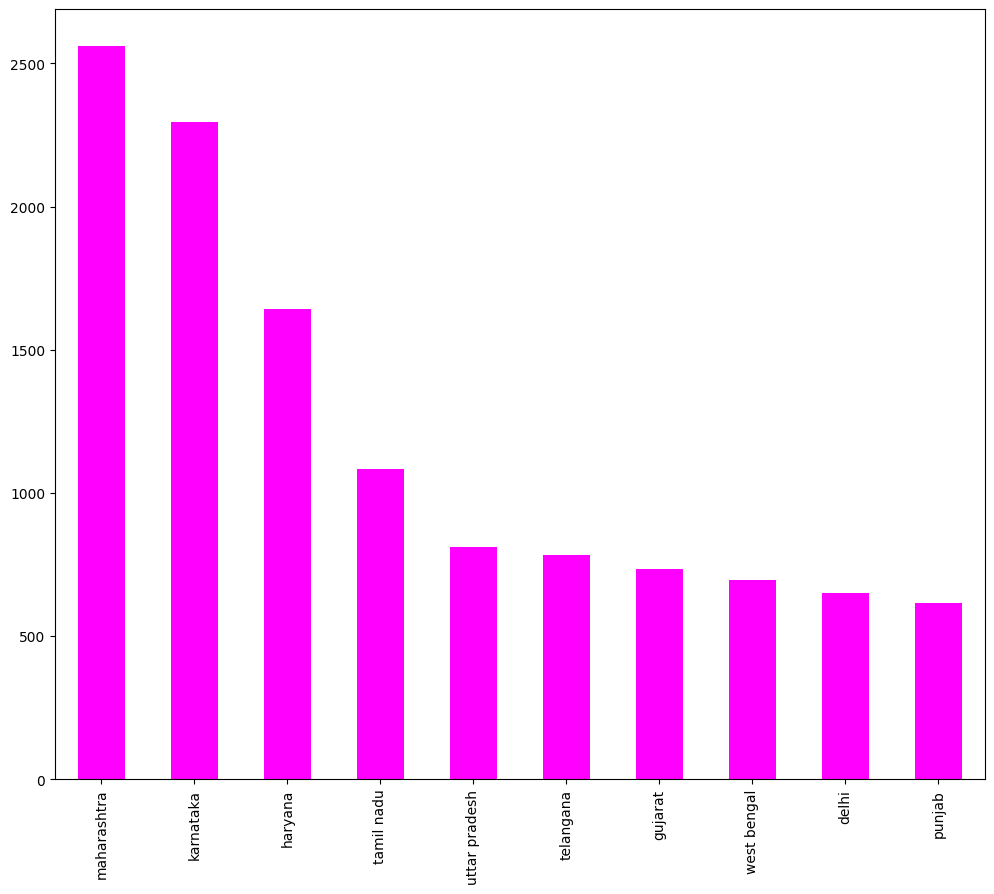

In [ ]:
top_dest_states=trip_agg['destination_state'].value_counts()[0:10]
top_dest_states.plot(kind='bar',figsize=(12,10),color='magenta')

<Axes: >

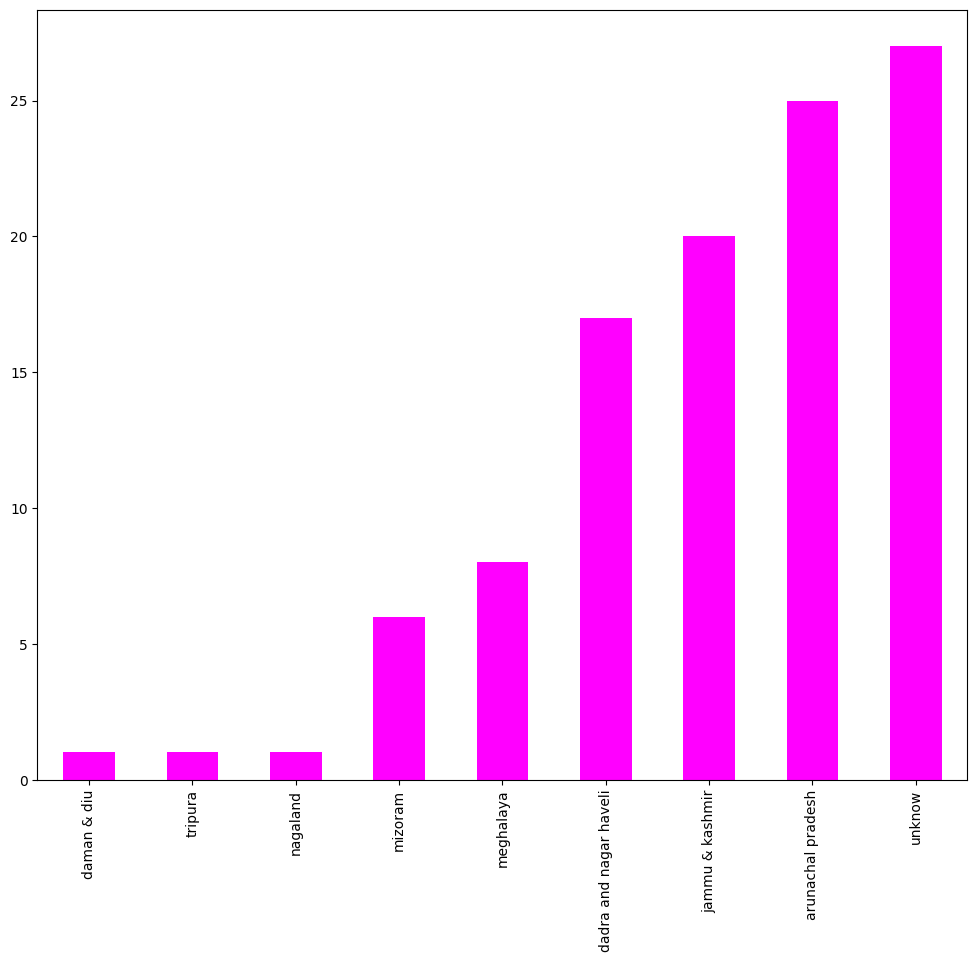

In [ ]:
top_dest_states=trip_agg['destination_state'].value_counts()[-1:-10:-1]
top_dest_states.plot(kind='bar',figsize=(12,10),color='magenta')

<Axes: >

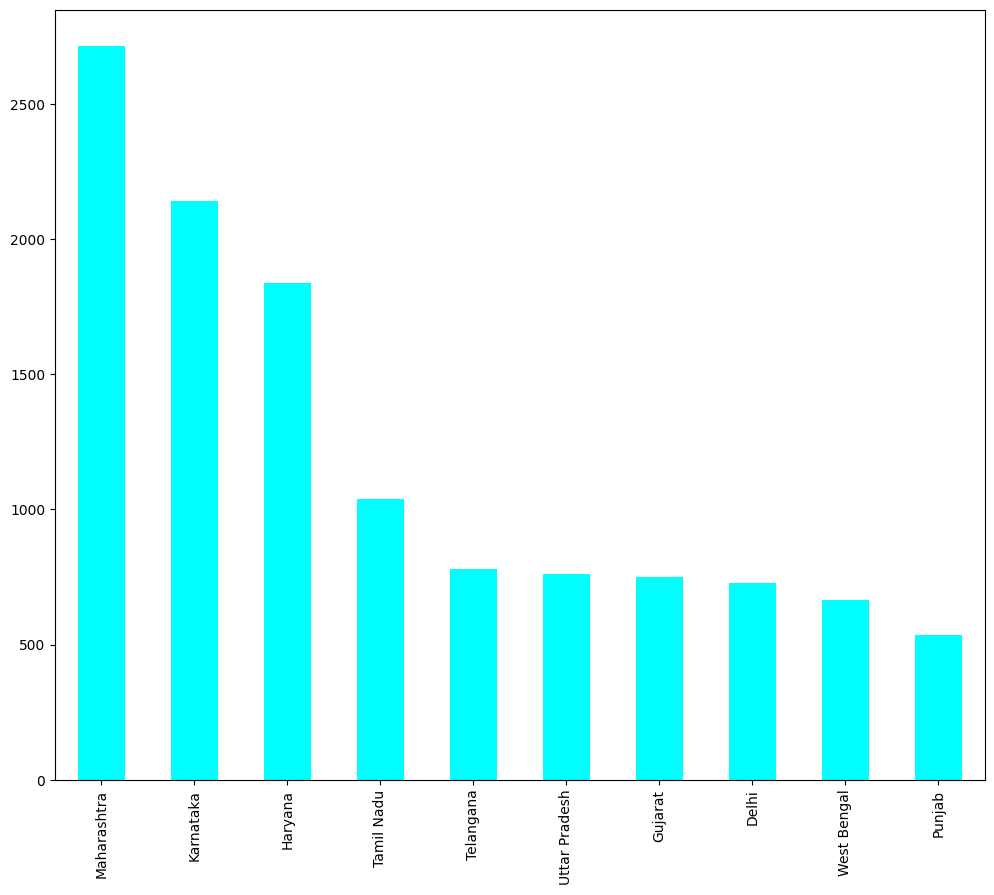

In [ ]:
top_source_states=trip_agg['source_state'].value_counts()[0:10]
top_source_states.plot(kind='bar',figsize=(12,10),color='cyan')

<Axes: >

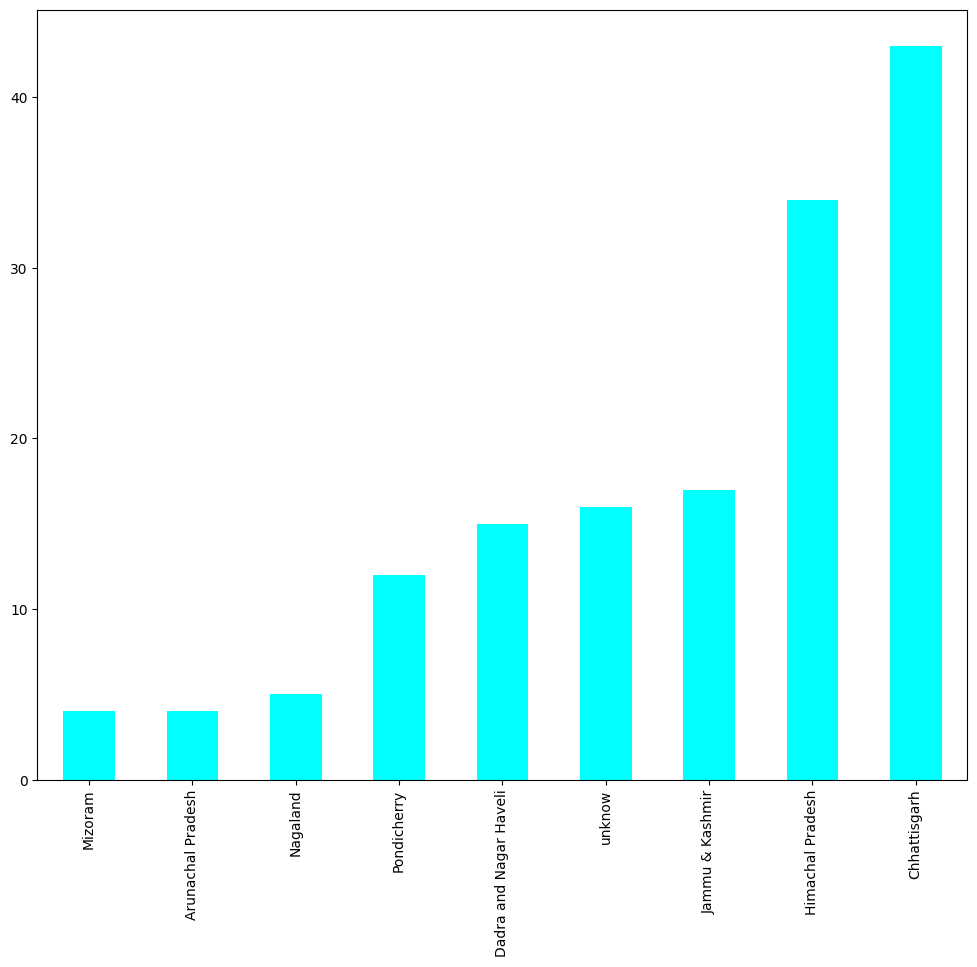

In [ ]:
top_source_states=trip_agg['source_state'].value_counts()[-1:-10:-1]
top_source_states.plot(kind='bar',figsize=(12,10),color='cyan')

<Axes: xlabel='route_type', ylabel='segment_actual_time_sum'>

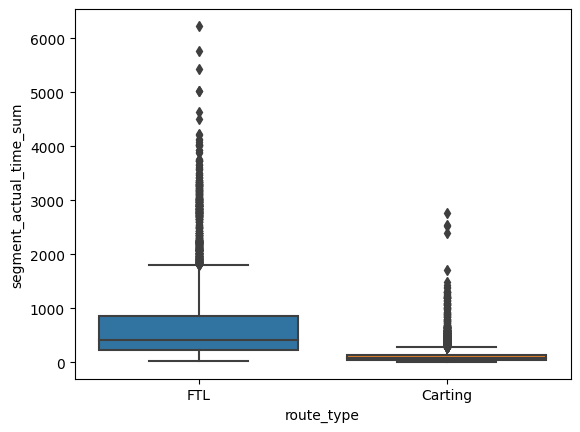

In [ ]:
sns.boxplot(x='route_type',y='segment_actual_time_sum',data=trip_agg)

Despite FTL which takes lesser checkpoints it takes more time to deiver than carting.

###Trip_creation_time: Extract features like month, year and day etc

In [ ]:
trip_agg['year'] = trip_agg['trip_creation_time'].dt.year
trip_agg['month'] = trip_agg['trip_creation_time'].dt.month
trip_agg['week'] = trip_agg['trip_creation_time'].dt.week
trip_agg['dayofweek'] = trip_agg['trip_creation_time'].dt.dayofweek
trip_agg['day'] = trip_agg['trip_creation_time'].dt.day_name()
trip_agg['hour'] = trip_agg['trip_creation_time'].dt.hour

In [ ]:
trip_agg[["year","month","hour","day","week","dayofweek"]]

,year,month,hour,day,week,dayofweek
0,2018,9,0,Wednesday,37,2
1,2018,9,0,Wednesday,37,2
2,2018,9,0,Wednesday,37,2
3,2018,9,0,Wednesday,37,2
4,2018,9,0,Wednesday,37,2
...,...,...,...,...,...,...
14812,2018,10,23,Wednesday,40,2
14813,2018,10,23,Wednesday,40,2
14814,2018,10,23,Wednesday,40,2
14815,2018,10,23,Wednesday,40,2


In [ ]:
trip_agg['year'].unique()

array([2018])

Only one year data is present of 2018.

In [ ]:
trip_agg['month'].value_counts()

9     13029
10     1788
Name: month, dtype: int64

In [ ]:
trip_agg['week'].value_counts()

38    5004
39    4417
37    3608
40    1788
Name: week, dtype: int64

In [ ]:
trip_agg['day'].value_counts()

Wednesday    2739
Saturday     2130
Thursday     2106
Friday       2060
Tuesday      2040
Monday       1987
Sunday       1755
Name: day, dtype: int64

In [ ]:
trip_agg['hour'].value_counts()

22    1125
23    1107
20    1082
0      994
21     873
19     837
1      750
2      702
18     698
3      652
4      636
6      611
17     595
16     526
5      509
7      473
15     469
14     379
8      346
13     329
9      324
12     271
11     267
10     262
Name: hour, dtype: int64

### Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required

In [ ]:
segmented_data['od_time_diff_min'] = (segmented_data['od_end_time'] - segmented_data['od_start_time']).dt.total_seconds() /(60)
segmented_data[['od_time_diff_min']]

,od_time_diff_min
0,1260.616667
1,999.500000
2,58.833333
3,122.783333
4,834.633333
...,...
26363,62.116667
26364,91.100000
26365,44.183333
26366,287.483333


In [ ]:
segmented_data[['od_time_diff_min','start_scan_to_end_scan']].head()

,od_time_diff_min,start_scan_to_end_scan
0,1260.616667,1260.0
1,999.500000,999.0
2,58.833333,58.0
3,122.783333,122.0
4,834.633333,834.0


## **Analysis and Testing - Trip level data**

### Compare the difference between od_time_diff_min and start_scan_to_end_scan

---



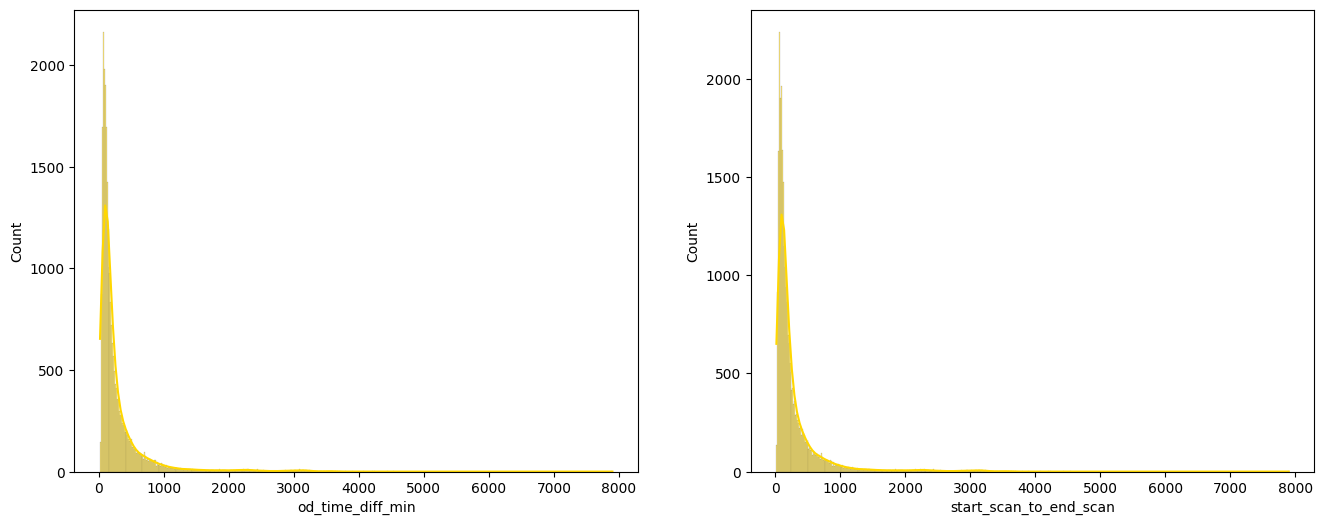

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(121)
sns.histplot(segmented_data["od_time_diff_min"],kde=True,color='gold')

plt.subplot(122)
sns.histplot(segmented_data["start_scan_to_end_scan"],kde=True,color='gold')

plt.show()


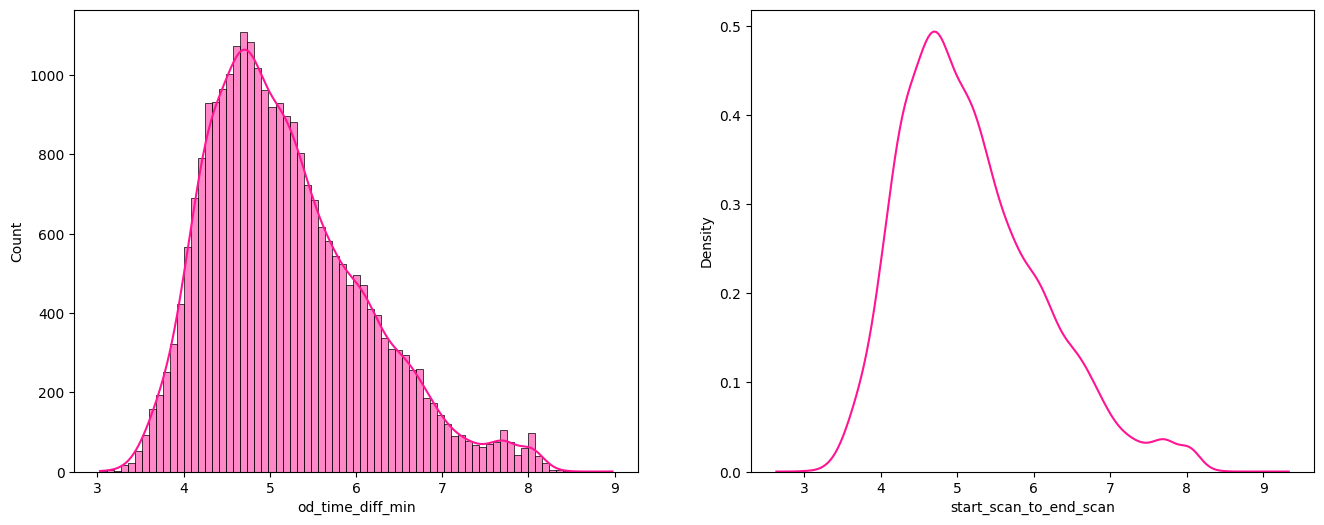

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(121)
sns.histplot(np.log(segmented_data["od_time_diff_min"]),kde=True,color='deeppink')


plt.subplot(122)
sns.kdeplot(np.log(segmented_data["start_scan_to_end_scan"]),color='deeppink')

plt.show()

In [ ]:
from statsmodels.graphics.gofplots import qqplot_2samples,qqplot

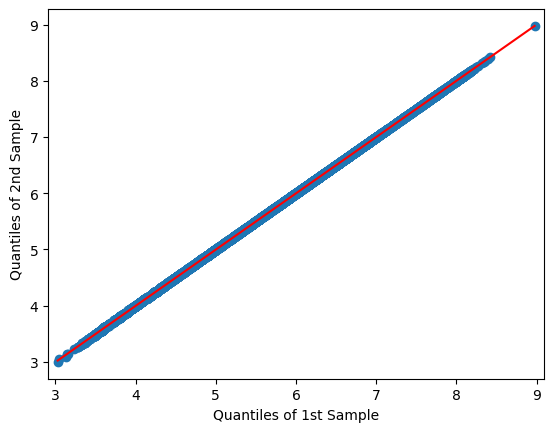

In [ ]:
qqplot_2samples(np.log(segmented_data["od_time_diff_min"]),np.log(segmented_data["start_scan_to_end_scan"]),line="r")
plt.show()

From the Q-Q Plot we can observe both samples follow normal distribution.

In [ ]:
#Performing Hypothesis testing to check whether both sample means are same

In [ ]:
#H0:Both means are same
#Ha:both means are different
t_stat,pvalue= ttest_rel(np.log(segmented_data["od_time_diff_min"]),np.log(segmented_data["start_scan_to_end_scan"]),alternative="two-sided")
t_stat,pvalue


(77.28144409551132, 0.0)

In [ ]:
if pvalue <0.05:
  print(" Reject HO mean of given samples are different")

else:
  print("Accept HO mean of given samples are same")

 Reject HO mean of given samples are different


### Hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value

<Axes: xlabel='actual_time', ylabel='Count'>

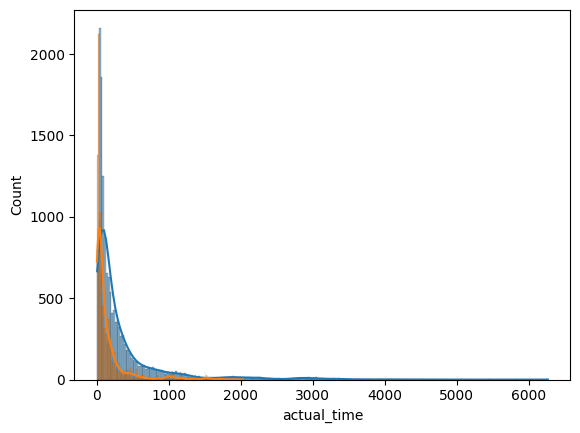

In [ ]:
sns.histplot(trip_agg["actual_time"],kde=True)
sns.histplot(trip_agg["osrm_time"],kde=True)

In [ ]:
actual_time_subset=trip_agg['actual_time'].sample(5000)
test_stat,p_value=shapiro(actual_time_subset)
p_value

0.0

In [ ]:
# Data is not gaussian

In [ ]:
test_stat,p_value=kstest(actual_time_subset,lognorm.cdf,args=(actual_time_subset.mean(),actual_time_subset.std()))
p_value

0.0

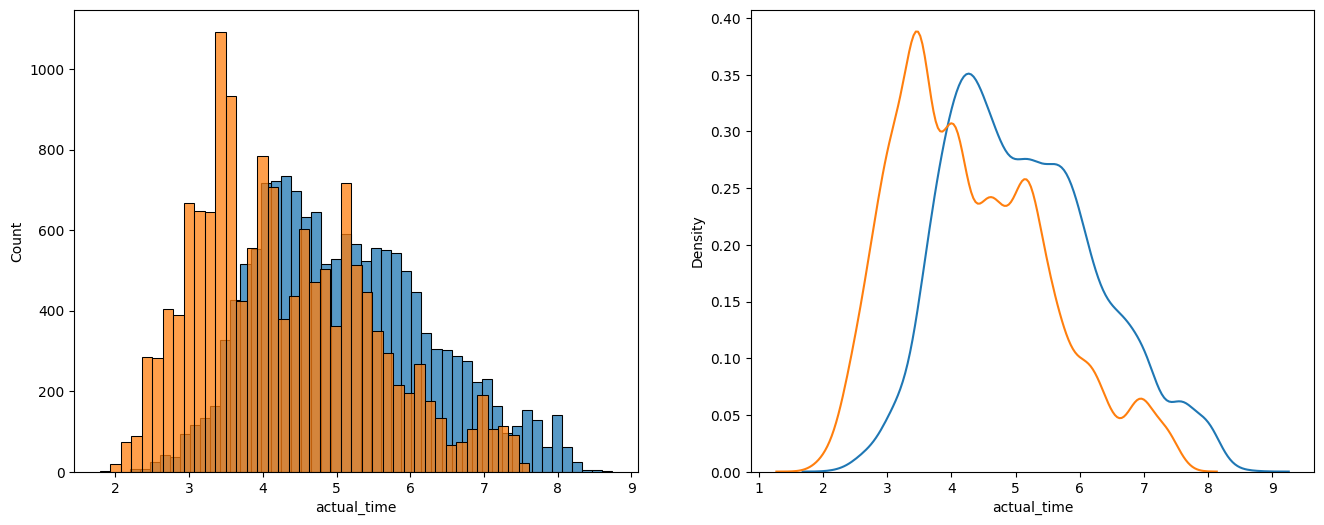

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(121)
sns.histplot(np.log(trip_agg["actual_time"]))
sns.histplot(np.log(trip_agg["osrm_time"]))

plt.subplot(122)
sns.kdeplot(np.log(trip_agg["actual_time"]))
sns.kdeplot(np.log(trip_agg["osrm_time"]))

plt.show()

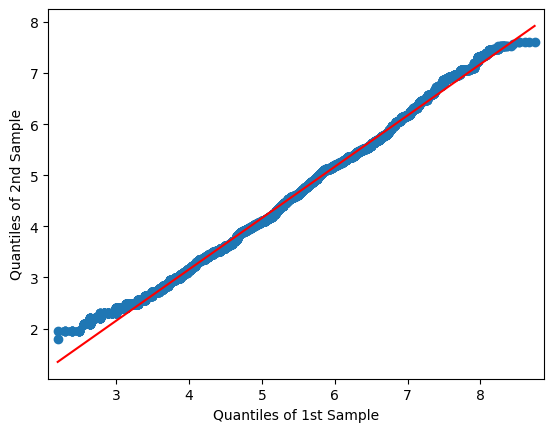

In [ ]:
qqplot_2samples(np.log(trip_agg["actual_time"]),np.log(trip_agg["osrm_time"]),line="r")
plt.show()

Q-Q plot shows both samples almost following a normal distribution.

In [ ]:
tstat,pvalue= ttest_rel(np.log(trip_agg["actual_time"]),np.log(trip_agg["osrm_time"]),alternative="two-sided")
tstat,pvalue

(221.7551341280849, 0.0)

In [ ]:
if pvalue <0.05:
  print(" rejecting Null hypothesis : mean of given samples are different")

else:
  print("accepting Null hypothesis : mean of given samples are same")

 rejecting Null hypothesis : mean of given samples are different


**Hypothesis for Wilcoxon test**

H0:Both rank sums is same

HA:Both rank sums are diferent

In [ ]:
wstat,pvalue=wilcoxon(trip_agg["actual_time"],trip_agg["osrm_time"],zero_method='wilcox',alternative='two-sided')
wstat,pvalue

(95811.5, 0.0)

In [ ]:
if pvalue <0.05:
  print(" Both rank sums are different")

else:
  print("accepting Null hypothesis : Both rank sums are same")

 Both rank sums are different


# Hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value

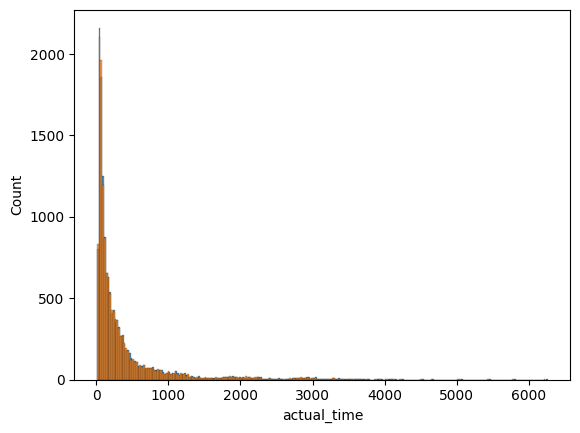

In [ ]:
sns.histplot(trip_agg["actual_time"])
sns.histplot(trip_agg["segment_actual_time_sum"])
plt.show()

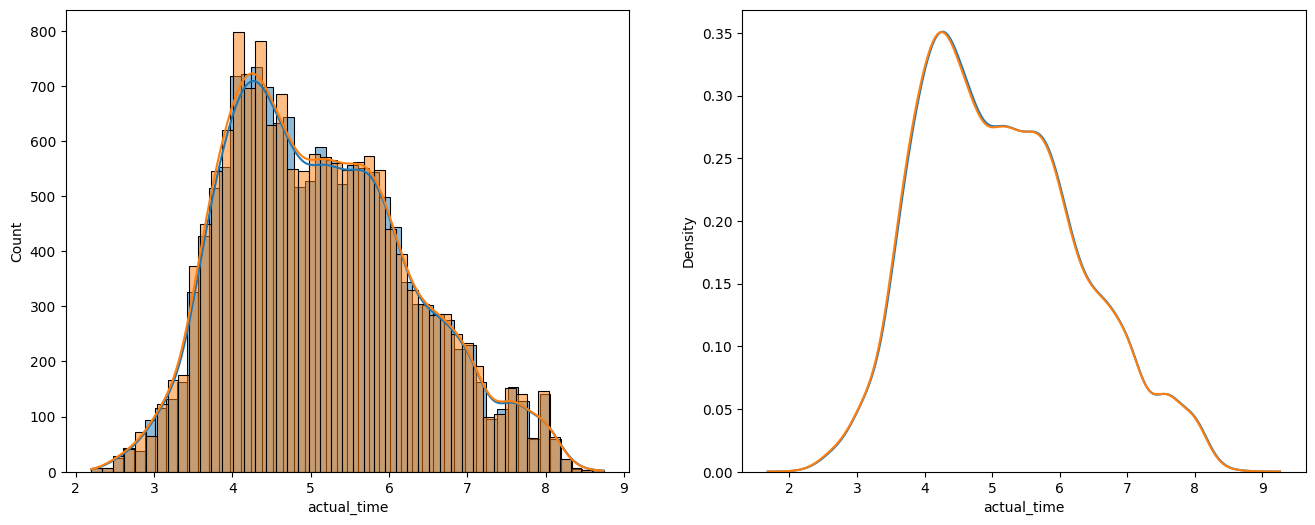

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(121)
sns.histplot(np.log(trip_agg["actual_time"]),kde=True)
sns.histplot(np.log(trip_agg["segment_actual_time_sum"]),kde=True)

plt.subplot(122)
sns.kdeplot(np.log(trip_agg["actual_time"]))
sns.kdeplot(np.log(trip_agg["segment_actual_time_sum"]))

plt.show()

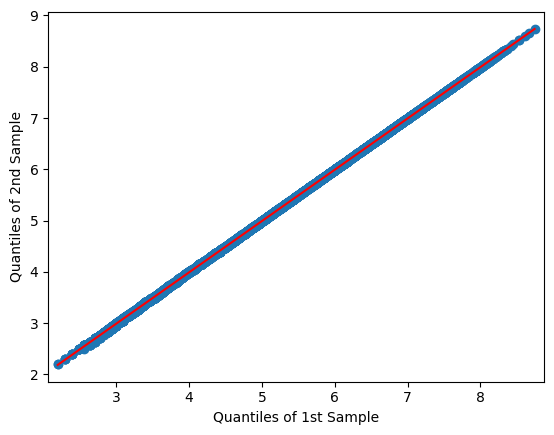

In [ ]:
qqplot_2samples(np.log(trip_agg["actual_time"]),np.log(trip_agg["segment_actual_time_sum"]),line="r")
plt.show()

In [ ]:
shapiro(np.log(trip_agg['actual_time']))

ShapiroResult(statistic=0.9794819355010986, pvalue=2.357824796072937e-41)

In [ ]:
tstat,pvalue= ttest_rel(np.log(trip_agg["actual_time"]),np.log(trip_agg["segment_actual_time_sum"]),alternative="two-sided")
tstat,pvalue


(128.99128395022407, 0.0)

In [ ]:
if pvalue <0.05:
  print("rejecting Null hypothesis :  mean of given samples are different")

else:
  print("accepting Null hypothesis :  mean of given samples are same")

rejecting Null hypothesis :  mean of given samples are different


In [ ]:
wstat,pvalue=wilcoxon(trip_agg["actual_time"],trip_agg["segment_actual_time_sum"],alternative='two-sided')
wstat,pvalue

(11330.0, 0.0)

In [ ]:
if pvalue <0.05:
  print(" Both rank sums are different")

else:
  print("accepting Null hypothesis : Both rank sums are same")

 Both rank sums are different


**Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value**

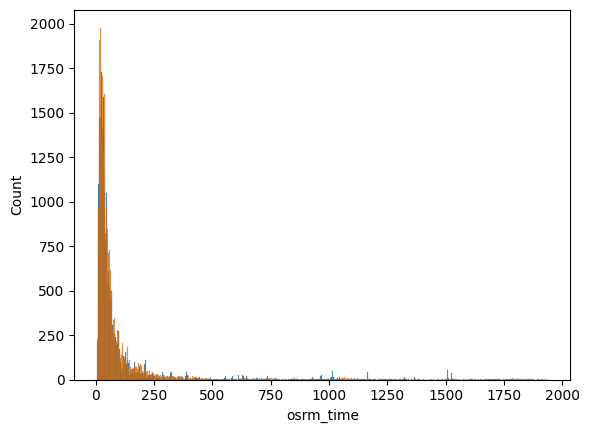

In [ ]:
sns.histplot(segmented_data["osrm_time"])
sns.histplot(segmented_data["segment_osrm_time_sum"])
plt.show()

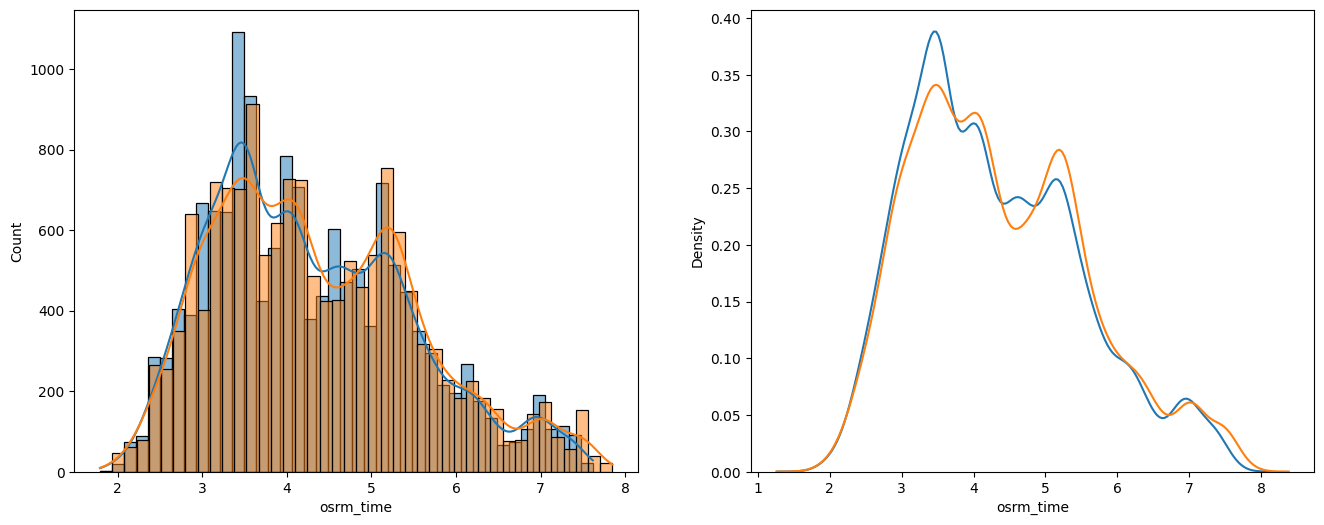

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(121)
sns.histplot(np.log(trip_agg["osrm_time"]),kde=True)
sns.histplot(np.log(trip_agg["segment_osrm_time_sum"]),kde=True)

plt.subplot(122)
sns.kdeplot(np.log(trip_agg["osrm_time"]))
sns.kdeplot(np.log(trip_agg["segment_osrm_time_sum"]))

plt.show()

In [ ]:
shapiro(np.log(segmented_data['osrm_time'])),shapiro(np.log(segmented_data['segment_osrm_time_sum']))

(ShapiroResult(statistic=0.9260538816452026, pvalue=0.0),
 ShapiroResult(statistic=0.9313356876373291, pvalue=0.0))

In [ ]:
#Lets calculate p value using Wilcoxon test

In [ ]:
wstat,pvalue=wilcoxon(segmented_data['osrm_time'],segmented_data['segment_osrm_time_sum'])
wstat,p_value

(50200794.5, 0.0)

In [ ]:
if pvalue <0.05:
  print(" Both rank sums are different")

else:
  print("accepting Null hypothesis : Both rank sums are same")

 Both rank sums are different


### Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value

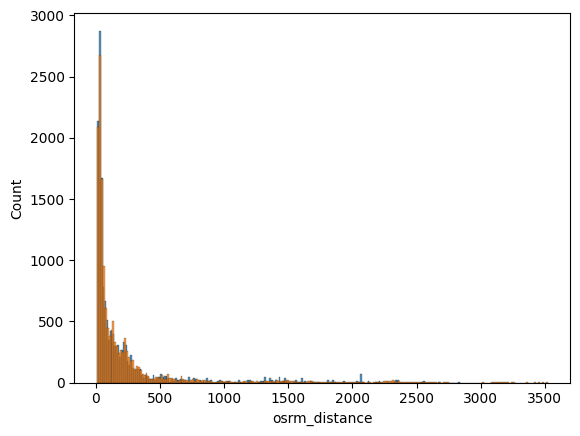

In [ ]:
sns.histplot(trip_agg["osrm_distance"])
sns.histplot(trip_agg["segment_osrm_distance_sum"])

plt.show()

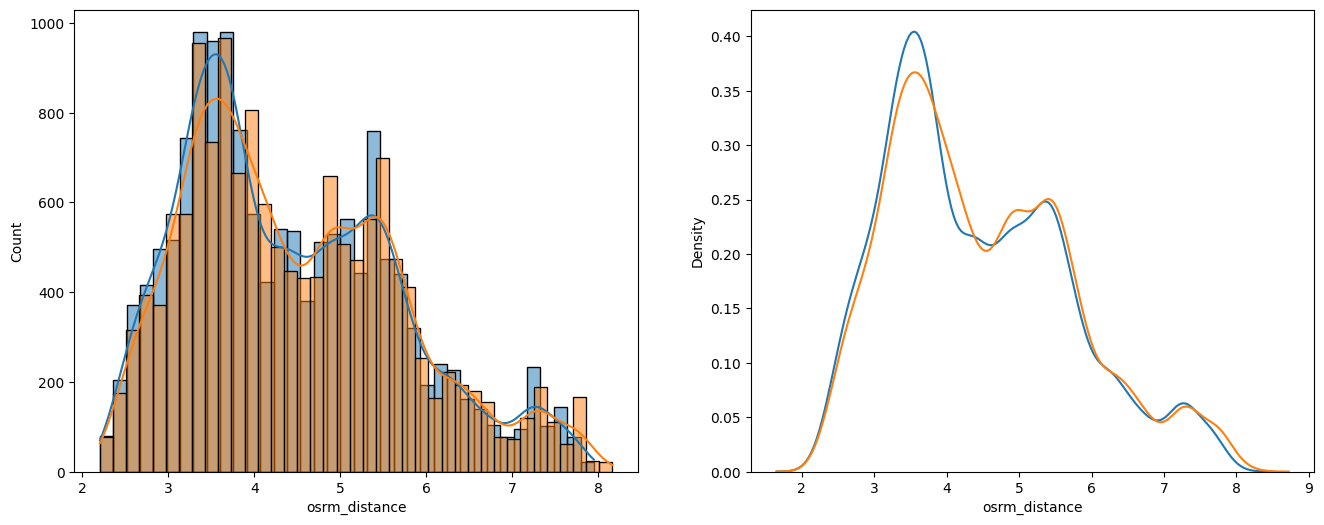

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(121)
sns.histplot(np.log(trip_agg["osrm_distance"]),kde=True)
sns.histplot(np.log(trip_agg["segment_osrm_distance_sum"]),kde=True)

plt.subplot(122)
sns.kdeplot(np.log(trip_agg["osrm_distance"]))
sns.kdeplot(np.log(trip_agg["segment_osrm_distance_sum"]))

plt.show()

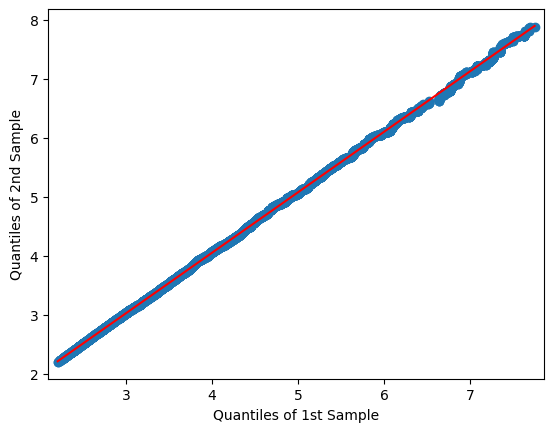

In [ ]:
qqplot_2samples(np.log(segmented_data["osrm_distance"]),np.log(segmented_data["segment_osrm_distance_sum"]),line="r")

plt.show()

In [ ]:
tstat,pvalue= ttest_rel(np.log(segmented_data["osrm_distance"]),np.log(segmented_data["segment_osrm_distance_sum"]),alternative="two-sided")

if pvalue <0.05:
  print("rejecting Null hypothesis :  mean of given samples are different")

else:
  print("accepting Null hypothesis :  mean of given samples are same")


rejecting Null hypothesis :  mean of given samples are different


**Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value**

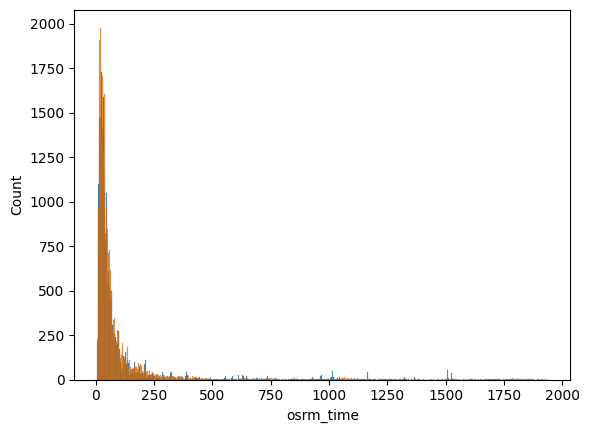

In [ ]:
sns.histplot(segmented_data["osrm_time"])
sns.histplot(segmented_data["segment_osrm_time_sum"])
plt.show()

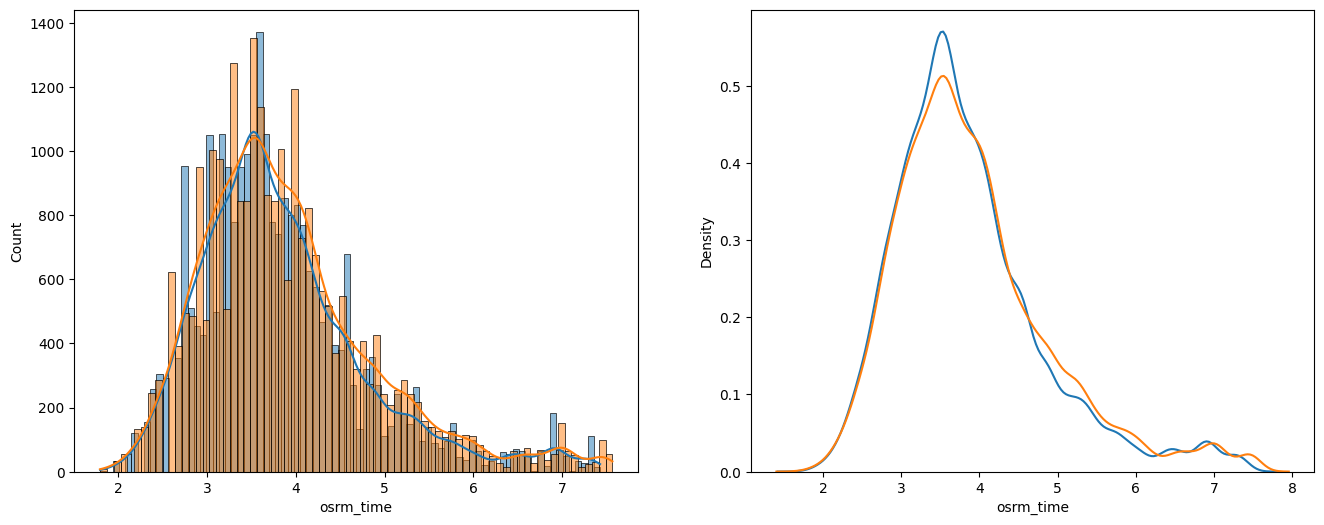

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(121)
sns.histplot(np.log(segmented_data["osrm_time"]),kde=True)
sns.histplot(np.log(segmented_data["segment_osrm_time_sum"]),kde=True)

plt.subplot(122)
sns.kdeplot(np.log(segmented_data["osrm_time"]))
sns.kdeplot(np.log(segmented_data["segment_osrm_time_sum"]))

plt.show()

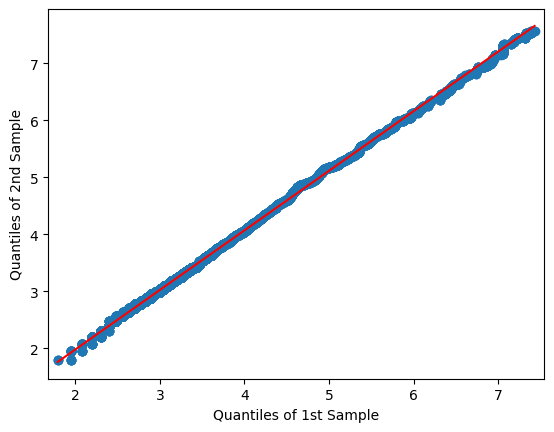

In [ ]:
qqplot_2samples(np.log(segmented_data["osrm_time"]),np.log(segmented_data["segment_osrm_time_sum"]),line="r")
plt.show()

In [ ]:
tstat,pvalue= ttest_rel(np.log(segmented_data["osrm_time"]),np.log(segmented_data["segment_osrm_time_sum"]),alternative="two-sided")

if pvalue <0.05:
  print("rejecting Null hypothesis :  mean of given samples are different")

else:
  print("accepting Null hypothesis :  mean of given samples are same")

rejecting Null hypothesis :  mean of given samples are different


In [ ]:
#CORRELATION OF NUMERICAL VARIABLES

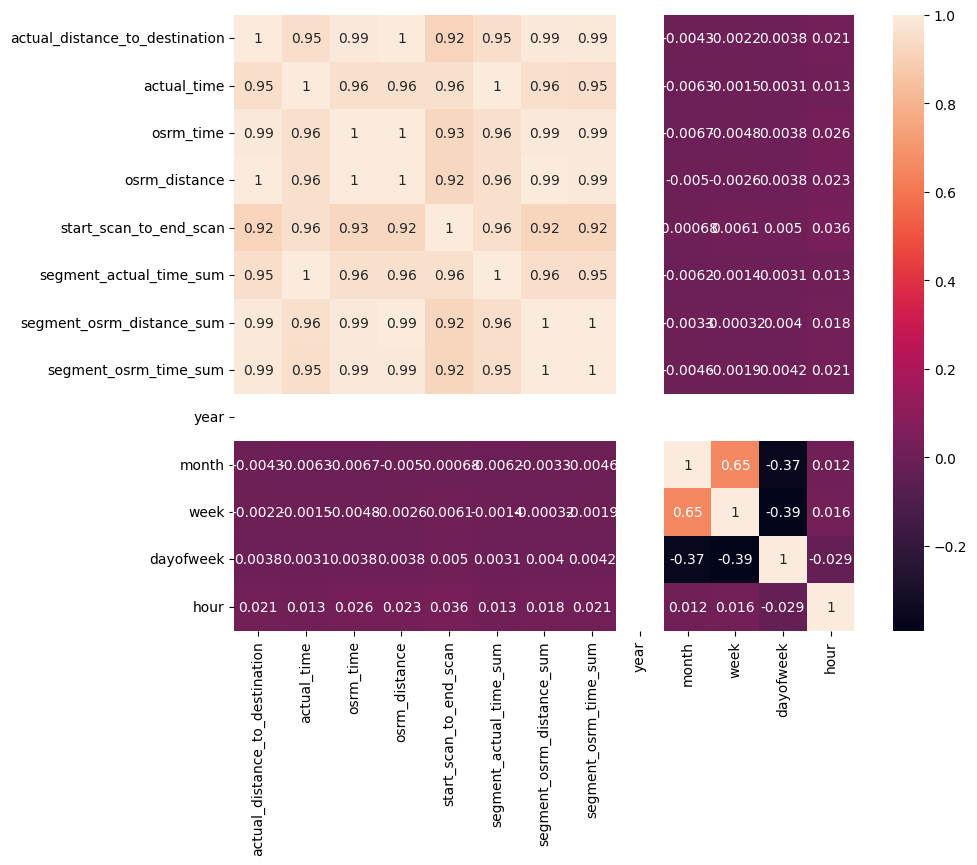

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(trip_agg.corr(), annot=True);

**Numerical features are highly correlated with each other except date columns**

**Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis**

In [ ]:
trip_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14817 non-null  object        
 1   trip_creation_time              14817 non-null  datetime64[ns]
 2   route_schedule_uuid             14817 non-null  object        
 3   route_type                      14817 non-null  object        
 4   trip_uuid                       14817 non-null  object        
 5   source_center                   14817 non-null  object        
 6   source_name                     14817 non-null  object        
 7   destination_center              14817 non-null  object        
 8   destination_name                14817 non-null  object        
 9   od_start_time                   14817 non-null  datetime64[ns]
 10  od_end_time                     14817 non-null  datetime64[ns]
 11  ac

In [ ]:
numerical_columns=[]
for i in trip_agg.columns:
  if trip_agg[i].dtype=='int64' or trip_agg[i].dtype=='float64':
    numerical_columns.append(i)

In [ ]:
numerical_columns

['actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'start_scan_to_end_scan',
 'segment_actual_time_sum',
 'segment_osrm_distance_sum',
 'segment_osrm_time_sum',
 'year',
 'month',
 'week',
 'dayofweek',
 'hour']

<Axes: >

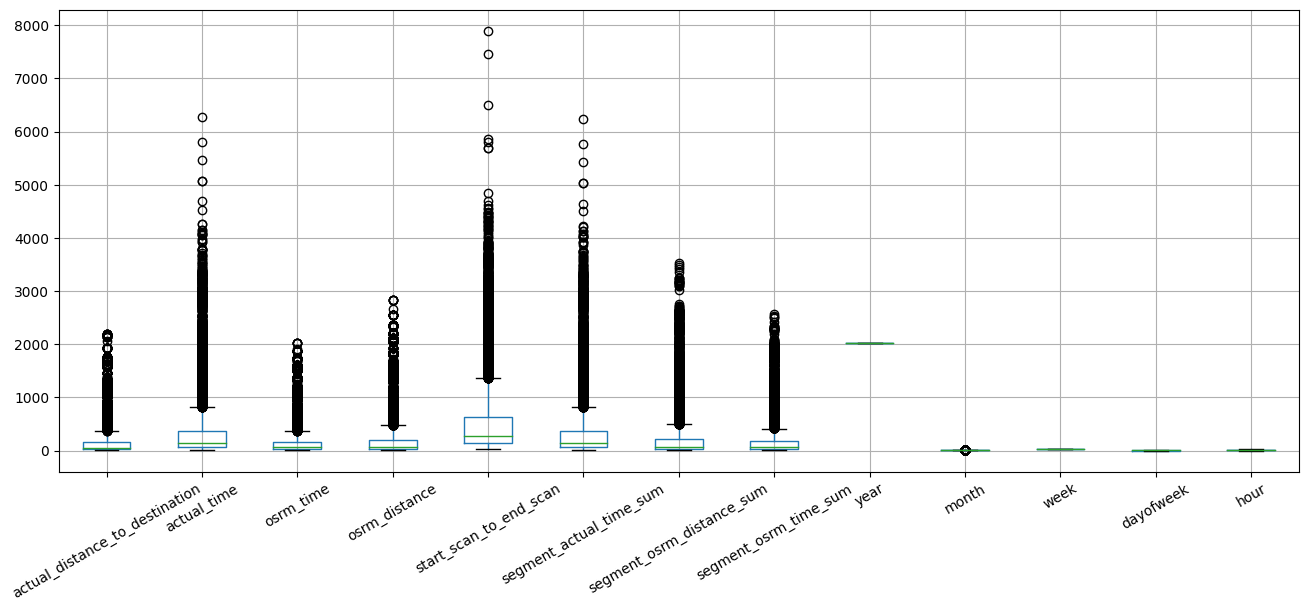

In [ ]:
trip_agg[numerical_columns].boxplot(figsize=(16,6),rot=30)

### **Outlier treatment: Handle the outliers using the IQR method**

In [ ]:
Q1 = trip_agg[numerical_columns].quantile(0.25)
Q3 = trip_agg[numerical_columns].quantile(0.75)

IQR = Q3 - Q1

In [ ]:
IQR

actual_distance_to_destination    141.745969
actual_time                       303.000000
osrm_time                         139.000000
osrm_distance                     177.655800
start_scan_to_end_scan            488.000000
segment_actual_time_sum           301.000000
segment_osrm_distance_sum         186.147900
segment_osrm_time_sum             154.000000
year                                0.000000
month                               0.000000
week                                1.000000
dayofweek                           4.000000
hour                               16.000000
dtype: float64

In [ ]:
trip_agg = trip_agg[((trip_agg[numerical_columns] > (Q1 - 1.5 * IQR)) | (trip_agg[numerical_columns] < (Q3 + 1.5 * IQR))).any(axis=1)]
trip_agg = trip_agg.reset_index(drop=True)

In [ ]:
trip_agg

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,source_place,source_code,source_state,source_city,year,month,week,dayofweek,day,hour
0,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2018-09-12 16:39:46,...,Central,6,Uttar Pradesh,Kanpur,2018,9,37,2,Wednesday,0
1,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),2018-09-12 02:03:09,...,ChikaDPP,D,Karnataka,Doddablpur,2018,9,37,2,Wednesday,0
2,training,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),2018-09-14 03:40:17,...,Bilaspur,HB,Haryana,Gurgaon,2018,9,37,2,Wednesday,0
3,training,2018-09-12 00:01:00,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),2018-09-12 00:01:00,...,Mumbai,Mumbai Hub,Maharashtra,Mumbai,2018,9,37,2,Wednesday,0
4,training,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),2018-09-12 00:02:09,...,Bellary,Dc,Karnataka,Bellary,2018,9,37,2,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),2018-10-03 23:55:56,...,Mehmdpur,H,Punjab,Chandigarh,2018,10,40,2,Wednesday,23
14813,test,2018-10-03 23:57:23,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),2018-10-03 23:57:23,...,Balabhgarh,DPC,Haryana,FBD,2018,10,40,2,Wednesday,23
14814,test,2018-10-03 23:57:44,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),2018-10-04 02:51:27,...,GovndNgr,DC,Uttar Pradesh,Kanpur,2018,10,40,2,Wednesday,23
14815,test,2018-10-03 23:59:14,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),2018-10-03 23:59:14,...,VdkkuSrt,I,Tamil Nadu,Tirunelveli,2018,10,40,2,Wednesday,23


<Axes: >

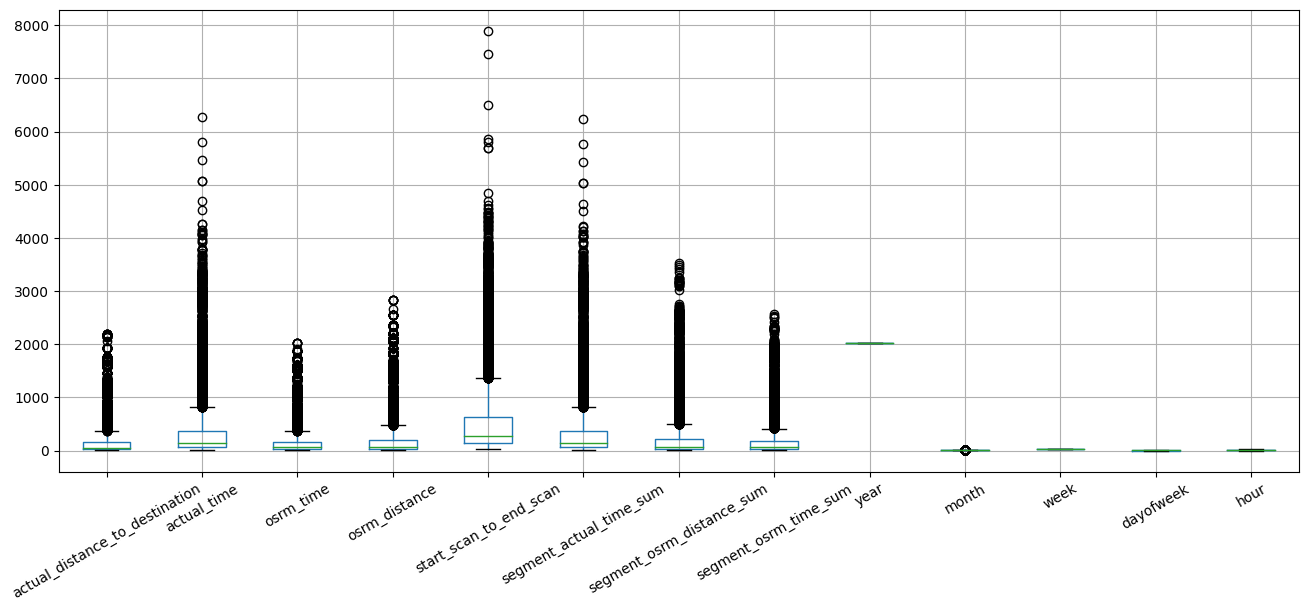

In [ ]:
trip_agg[numerical_columns].boxplot(figsize=(16,6),rot=30)

### **Handling categorical values: Do one-hot encoding of categorical variables (like route_type)**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(trip_agg[['data','route_type']]).toarray())

In [ ]:
enc_data

,0,1,2,3
0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0
...,...,...,...,...
14812,1.0,0.0,1.0,0.0
14813,1.0,0.0,1.0,0.0
14814,1.0,0.0,1.0,0.0
14815,1.0,0.0,1.0,0.0


### **Column Normalization /Column Standardization: Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(trip_agg[numerical_columns])

StandardScaler()

In [ ]:
trip_agg[numerical_columns] = scaler.transform(trip_agg[numerical_columns])

In [ ]:
trip_agg[numerical_columns]

,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,start_scan_to_end_scan,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,year,month,week,dayofweek,hour
0,2.162092,2.146251,2.047585,2.124848,2.623702,2.146791,2.633784,2.629468,0.0,-0.370449,-1.339007,-0.476914,-1.558901
1,-0.298944,-0.381461,-0.344144,-0.321920,-0.532593,-0.382742,-0.333670,-0.368643,0.0,-0.370449,-1.339007,-0.476914,-1.558901
2,5.772935,5.325931,5.817598,5.804050,5.165134,5.310954,5.573660,5.595785,0.0,-0.370449,-1.339007,-0.476914,-1.558901
3,-0.482362,-0.531093,-0.539462,-0.498578,-0.654047,-0.530163,-0.488040,-0.524430,0.0,-0.370449,-1.339007,-0.476914,-1.558901
4,-0.121257,-0.028757,-0.163566,-0.155387,0.282670,-0.024976,-0.183405,-0.209676,0.0,-0.370449,-1.339007,-0.476914,-1.558901
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,-0.349454,-0.488341,-0.366255,-0.353368,-0.415693,-0.488813,-0.380078,-0.378181,0.0,2.699428,1.760680,-0.476914,1.321037
14813,-0.487802,-0.598784,-0.550518,-0.508275,-0.714774,-0.598480,-0.497133,-0.540327,0.0,2.699428,1.760680,-0.476914,1.321037
14814,-0.411926,-0.133856,-0.417849,-0.392677,-0.166711,-0.131047,-0.283991,-0.295518,0.0,2.699428,1.760680,-0.476914,1.321037
14815,-0.097433,-0.165920,0.064919,-0.089730,-0.279057,-0.172397,0.000795,0.127333,0.0,2.699428,1.760680,-0.476914,1.321037


### Insights

- There is no concrete way for imputation here but we can take unknown in place of source_name and destination_name for our segment analysis.

- Neither of the declared numerical variables follow normal distribution and are also extremely skewed towards the right except time variables

- Most orders come mid-week
- Most orders are sourced from states like maharashtra, karnataka, haryana, tamil nadu, telangana
- Most common route type is Carting

- It implies means of both the start_scan_to_end_scan and od_trip_duration are statistically different need to find why these difference is occuring.

- Both the actual_time & osrm_time have different means and distributions
- Both the actual_time & segment_actual_time_sum are statistically different so there is some time consumed in actual time
- Both the osrm_distance & segment_osrm_distance_sum are not significantly equal.
- Even though osrm_distance and segment_osrm_distance enjoy a very high correlation but still the two variables are somewhat different from each other.
- Both the osrm_time & segment_osrm_time_sum are not significantly equal.
- Even though osrm_time and segment_osrm_time enjoy a very high correlation but still the two variables are somewhat different from each other.

## **Recommendations**

* Return to the information supplied into the routing engine for trip planning. If the routing engine is configured for optimal results, look for differences with transporters.

* The zones of North, South, and West exhibit high order volumes, whereas our presence in the Central, Eastern, and North-Eastern zones is comparatively lower. However, it would be difficult to draw a definitive conclusion based on only two months of data. Therefore, it would be worthwhile to conduct an investigation and explore opportunities to expand our presence in these regions.

* Looking at it from a state-wise standpoint, Maharashtra sees the highest traffic, closely followed by Karnataka. This serves as a clear indication that we should allocate our resources on the ground in these two states, particularly during the holiday season

* The destination centers/FC centers IND000000ACB and IND562132AAA have a higher number of packages/orders to be delivered to the source cities with average value counts of 821 and 548, respectively. This indicates the need to allocate our resources on the ground, especially during the holiday season, in these two centers

* Since we use small vehicles for transportation, specifically carts, we can consider replacing fuel/gas-powered carts with electric carts. This move would not only help us save costs but also promote our brand as an eco-friendly one